<a href="https://colab.research.google.com/github/Vess13/cd-angel-chaparro-2023/blob/main/Proyecto_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install pyproj

In [56]:
!pip install geopandas

In [57]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
  Using cached Cython-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Found existing installation: Cartopy 0.22.0
Uninstalling Cartopy-0.22.0:
  Successfully uninstalled Cartopy-0.22.0
  Using cached Cartopy-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)


In [58]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
  Using cached shapely-2.0.1-cp310-cp310-linux_x86_64.whl


In [59]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

from shapely.geometry import Polygon, Point
import shapefile


In [60]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [61]:
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [62]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [63]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

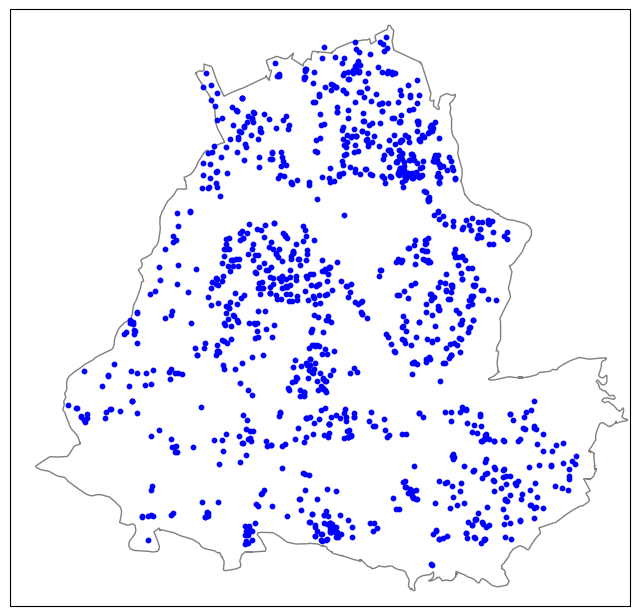

In [64]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [65]:
import geopandas as gpd
import urllib.request

def calculate_polygon_area(df, shapefile_url):
    """
    Calculate the area of a polygon using a shapefile.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the longitude and latitude data.
    - shapefile_url (str): The URL of the shapefile to use for the area calculation.

    Returns:
    - area (float): The area of the polygon in square meters.
    """

    # Download the shapefile files
    url = shapefile_url
    file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]
    for file in file_list:
        urllib.request.urlretrieve(url + file, file)

    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file('68276_urbano.shp')

    # Ensure the GeoDataFrame is in a suitable projection (e.g., UTM)
    gdf = gdf.to_crs('EPSG:32618')  # Change 'EPSG:32618' to the appropriate UTM zone for your area

    # Calculate the area and sum it up (in square meters)
    area = gdf.geometry.area.sum()

    return area

# Example usage:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
shapefile_url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'
polygon_area = calculate_polygon_area(df, shapefile_url)
print(f"Area of the polygon: {polygon_area} square meters")


Area of the polygon: 14180920.862356503 square meters


In [66]:
import numpy as np

# Función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Función para calcular el índice de Ripley con una distancia fija
def ripley_k_fixed_distance(data, fixed_distance):
    n = len(data)
    count = 0

    for i in range(n):
        for j in range(n):
            if j > i:
                dist = euclidean_distance(data[i], data[j])
                if dist <= fixed_distance:
                    count += 1

    ripley_value = (polygon_area/(n*n))*count #(count / n) / (np.pi * fixed_distance * fixed_distance)
    return ripley_value


In [67]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [68]:
# Crear una lista de coordenadas UTM
utm_coords = df[['x', 'y']].values
utm_coords

array([[709584.02755874, 782579.28186627],
       [709262.12137799, 782963.35410304],
       [710847.92465398, 784163.82509702],
       ...,
       [709492.78278312, 784279.99626355],
       [710198.57491572, 780930.64855507],
       [712027.27741723, 781097.16920956]])

In [69]:
# Distancia fija de 100 unidades UTM
distances = [100,200,400,600,800]

# Numero de grupos random a generar
num_random_groups = 9

In [70]:
ripley_original_list=[]
for distance in distances:
  # Calcular el índice de Ripley con la distancia fija para el conjunto original
  ripley_original = ripley_k_fixed_distance(utm_coords, distance)
  ripley_original_list.append(ripley_original)
ripley_original_list

[35420.158673535436,
 109127.5677986049,
 334042.90417203505,
 632273.8731542864,
 986991.8925701497]

In [71]:
# Cargar el archivo shapefile
gdf = gpd.read_file('68276_urbano.shp')

# Definir el sistema de coordenadas original (latitud y longitud)
crs_original = {'init': 'epsg:4326'}

# Obtener el polígono como una instancia de Polygon
polygon = gdf.unary_union

# Número de puntos aleatorios deseados
num_points = 1262

utm_coords_random_list=[]

for _ in range(num_random_groups):
  # Generar puntos aleatorios dentro del polígono
  random_points = []
  while len(random_points) < num_points:
      x = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
      y = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
      point = Point(x, y)
      if point.within(polygon):
          random_points.append(point)

  # Definir el sistema de coordenadas de destino (UTM, Zona 18 Norte)
  crs_destination = {'init': 'epsg:32618'}

  # Crear el transformador de coordenadas
  transformer = pyproj.Transformer.from_crs(crs_original, crs_destination, always_xy=True)

  # Convertir los puntos aleatorios a UTM
  utm_coords_random = [transformer.transform(point.x, point.y) for point in random_points]
  utm_coords_random_list.append(utm_coords_random)

utm_coords_random_list


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


[[(710003.3918869268, 783535.5974984262),
  (710326.3121719758, 781758.5572382667),
  (708393.2633552592, 782444.1689775327),
  (709248.9590732863, 783318.3883480454),
  (708878.2869565622, 781623.5723405002),
  (708570.4291611934, 781564.383769961),
  (710762.6683610498, 782851.5326110366),
  (710274.2397828847, 784438.6254067628),
  (709872.4488047921, 783792.9976092221),
  (709643.8134180426, 781134.2217743888),
  (710668.2611921724, 784911.0000432697),
  (711938.2714390442, 781624.4632597038),
  (711868.1146537587, 781994.0943957102),
  (708754.8054567678, 782557.396827175),
  (711281.4308552141, 781420.2162197969),
  (710015.9952526866, 783081.1236167029),
  (711602.8278498582, 782909.526327831),
  (709836.7704420144, 781566.7525797697),
  (709671.5833883674, 782236.7332969261),
  (708694.4206386495, 782202.4207884094),
  (710671.0088923443, 780826.195265886),
  (709406.8361354712, 784361.3415460496),
  (709788.7261280131, 783647.2538081962),
  (709142.76901958, 784027.3983971027)

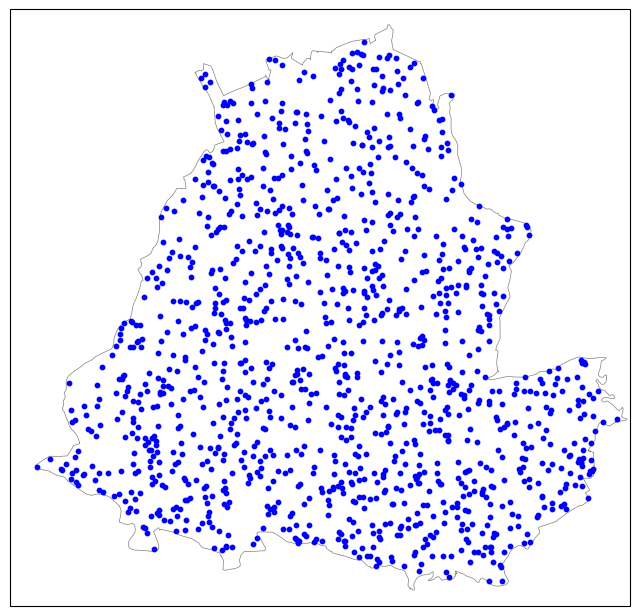

In [72]:
# Coordenadas UTM de la región de interés
lower_easting = 600000
upper_easting = 650000
lower_northing = 7500000
upper_northing = 7550000

# Crear la figura y el eje con la proyección PlateCarree
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Agregar características de fondo, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Cargar el shapefile de los límites de la región
sf = shapefile.Reader('68276_urbano.shp')
shapes = sf.shapes()
for shape in shapes:
    vertices = np.array(shape.points)
    ax.plot(vertices[:, 0], vertices[:, 1], transform=ccrs.PlateCarree(), color='gray', linewidth=0.5)

# Generar puntos aleatorios en coordenadas UTM
num_points = len(utm_coords_random)
x_coords, y_coords = zip(*utm_coords_random)

# Graficar los puntos aleatorios
ax.scatter(x_coords, y_coords, transform=ccrs.UTM(18), zorder=10, c='b', s=10)

# Esta es la grafica de puntos aleatorios, para verificar visualmente que no es la misma que la que tiene el df
plt.show()


In [75]:
ripley_random_values_list = []

for distance in distances:
    ripley_random_values = []  # Crear una nueva lista para cada distancia
    for _ in range(num_random_groups):
        ripley_result = ripley_k_fixed_distance(utm_coords_random_list[_], distance)
        ripley_random_values.append(ripley_result)

    ripley_random_values_list.append(ripley_random_values)

ripley_random_values_list


[[15786.8128024581,
  15492.98041527191,
  15154.627969421143,
  14656.003312377909,
  15395.036286209845,
  15252.572098483208,
  15083.395875557824,
  14647.099300644995,
  15083.395875557824],
 [59434.278317206896,
  59158.25395348653,
  60030.84710331219,
  58552.78115564832,
  59069.21383615738,
  59443.18232893981,
  59469.89436413855,
  56807.594855997,
  58837.709531101595],
 [223980.41514147408,
  224568.07991584644,
  228031.74047995033,
  225547.5212064671,
  226820.79488427393,
  224835.2002678339,
  228022.83646821743,
  221059.899293078,
  223757.8148481512],
 [479908.4243806467,
  479926.2324041126,
  489275.4447236732,
  481983.0591144159,
  488296.00343305257,
  484912.4789745449,
  486719.99335632665,
  474637.2494347611,
  478465.9744799145],
 [814405.4331510605,
  806943.8713188778,
  833442.2102360325,
  818964.2871583129,
  820700.5694462312,
  818999.9032052446,
  817637.5894101085,
  799749.4298386825,
  812348.606440757]]

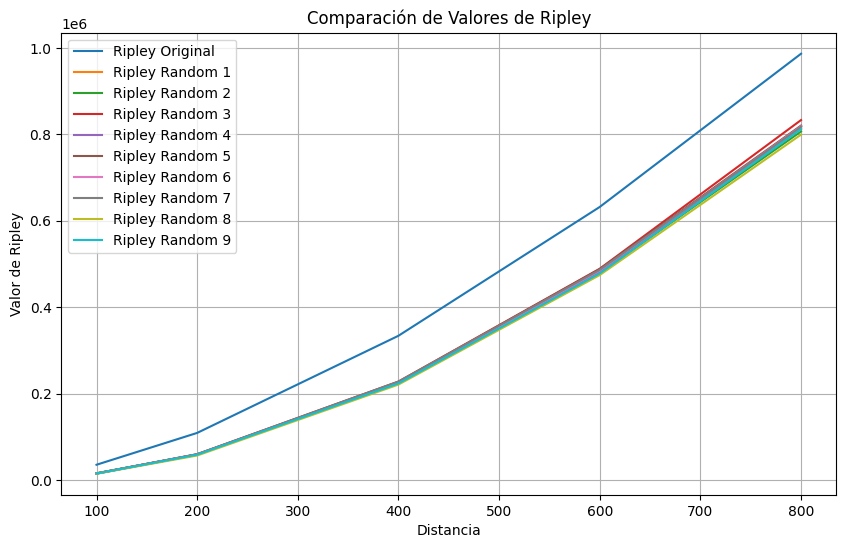

In [74]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores de Ripley original
plt.plot(distances, ripley_original_list, label='Ripley Original')

# Graficar los valores de Ripley con coordenadas UTM random
for i in range(len(ripley_random_values_list[0])):
    ripley_values = [ripley_random_values_list[j][i] for j in range(len(distances))]
    plt.plot(distances, ripley_values, label=f'Ripley Random {i+1}')

# Personalizar la gráfica
plt.xlabel('Distancia')
plt.ylabel('Valor de Ripley')
plt.title('Comparación de Valores de Ripley')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()